In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#input path
data_path = "/content/drive/MyDrive/Adewale Project/Datasets/"

In [ ]:
# importing required libraries and packages to be used
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

#importing algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#importing classes and function from scikitlearn library
from sklearn.metrics import accuracy_score #used to generate performance metrics
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
path_to_save_objects= "/content/drive/MyDrive/Adewale Project/Codes/saved-models/ensemble_pca_balanced"

import pickle

def save_pickle(obj_to_save, name, path_to_save_objects=path_to_save_objects):
  if path_to_save_objects.endswith("/"):
    path= path_to_save_objects + name + ".pkl"

  else:
    path= path_to_save_objects + "/" + name + ".pkl"
  
  
  pickle.dump(obj_to_save, open(path, "wb"))
  print("***", name, "saved successfully", "***")

  # return path

path_to_load_objects= "/content/drive/MyDrive/Adewale Project/Codes/saved-models/pca_balanced"
def load_pickle(name, path_to_load_objects= path_to_load_objects):
  if path_to_load_objects.endswith("/"):
    path= path_to_load_objects + name + ".pkl"

  else:
    path= path_to_load_objects + "/" + name + ".pkl"
  
  
  object_loaded= pickle.load(open(path, "rb"))
  print("***", name, "loaded successfully", "***")

  return object_loaded
  

In [ ]:
from timeit import default_timer
import time

class Timer:
  def __init__(self, startTimer=-1, stopTimer=-1, time=-1):
    self.startTimer= -1
    self.stopTimer= -1
    self.time= -1

  def start(self):
    self.startTimer= default_timer()

  def stop(self):
    self.stopTimer= default_timer()
    self.time= self.stopTimer- self.startTimer
    output_str= "elapsed time = "+ str(self.time) + " seconds" 
    print(output_str)

  def get_time(self):
    return(self.time)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(test, pred):
  label=[0, 1]
  cm = confusion_matrix (test, pred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, cmap="winter", fmt ="d",)
  plt.xlabel('Predicted', fontsize=13)
  plt.xticks([0.5, 1.5], label)
  plt.yticks([0.5, 1.5], label)
  plt.ylabel('Truth', fontsize=13)
  plt.title('CONFUSION MATRIX');

In [ ]:
import sklearn
def perform_metrics(truth, pred):
  accuracy, precision, recall, f1_score= 0,0,0,0
  accuracy= sklearn.metrics.accuracy_score(truth, pred)
  precision= sklearn.metrics.precision_score(truth, pred)
  recall= sklearn.metrics.recall_score(truth, pred)
  f1= sklearn.metrics.f1_score(truth, pred)
  classification_report= sklearn.metrics.classification_report(truth, pred)

  print("Accuracy = ", accuracy, sep="")
  print("precision = ", precision, sep="")
  print("recall = ", recall, sep="")
  print("f1 = ", f1, sep="")

  print("\n\n\t\t\t***CLASSIFICATION REPORT***\n")
  print(classification_report)


  # return accuracy, precision, recall, f1_score

# Load necessary files

Load dataset

In [ ]:
path_to_load_objects= "/content/drive/MyDrive/Adewale Project/Codes/saved-models/pca_balanced"

X= load_pickle(name="X", path_to_load_objects= path_to_load_objects)
y= load_pickle(name="y", path_to_load_objects= path_to_load_objects)

*** X loaded successfully ***
*** y loaded successfully ***


In [ ]:
(X.shape, y.shape)

((58645, 111), (58645,))

Load models

In [ ]:
path_to_load_objects= "/content/drive/MyDrive/Adewale Project/Codes/saved-models/pca_balanced"

# random forest
ranClf= load_pickle(name= "ranClf", path_to_load_objects= path_to_load_objects)

# extremely randomized trees
ertClf= load_pickle(name= "ertClf", path_to_load_objects= path_to_load_objects) 

# support vector machine
svmClf= load_pickle(name= "svmClf", path_to_load_objects= path_to_load_objects) 

# k nearest neighbours
knnClf= load_pickle(name= "knnClf", path_to_load_objects= path_to_load_objects)

# multilayer perceptron
mlpClf= load_pickle(name= "mlpClf", path_to_load_objects= path_to_load_objects)

*** ranClf loaded successfully ***
*** ertClf loaded successfully ***
*** svmClf loaded successfully ***
*** knnClf loaded successfully ***
*** mlpClf loaded successfully ***


# **Split Data**

In [ ]:
# Splitting the X and y into the
# Training set and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Feature Extraction**

In [ ]:
# Applying PCA function on training
# and testing set of X component

from sklearn.decomposition import PCA

pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# **Ensemble models**

In [ ]:
from sklearn.ensemble import VotingClassifier

## RF + ERT

In [ ]:
ensemble_rf_ert = VotingClassifier(estimators= [("Random Forest", ranClf), ("Extremely randomized trees", ertClf)], voting= "hard").fit(X_train, y_train)

In [ ]:
ensemble_rf_ert_test = Timer()
ensemble_rf_ert_test.start()

ensemble_rf_ert_pred = ensemble_rf_ert.predict(X_test)

ensemble_rf_ert_test.stop()

elapsed time = 0.5843490899999892 seconds


In [ ]:
save_pickle(ensemble_rf_ert, "ensemble_rf_ert")

*** ensemble_rf_ert saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_rf_ert_pred)

Accuracy = 0.9453491346235826
precision = 0.9483997387328543
recall = 0.9470079895646503
f1 = 0.9477033531859346


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5596
           1       0.95      0.95      0.95      6133

    accuracy                           0.95     11729
   macro avg       0.95      0.95      0.95     11729
weighted avg       0.95      0.95      0.95     11729



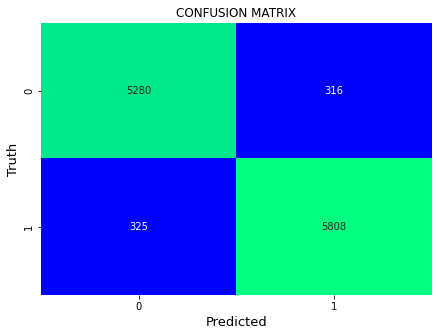

In [ ]:
plot_confusion_matrix(y_test, ensemble_rf_ert_pred)

## RF + SVM

In [ ]:
ensemble_rf_svm = VotingClassifier(estimators= [("Random Forest", ranClf), ("Support Vector Machine", svmClf)], voting= "hard").fit(X_train, y_train)

In [ ]:
ensemble_rf_svm_test = Timer()
ensemble_rf_svm_test.start()

ensemble_rf_svm_pred = ensemble_rf_svm.predict(X_test)

ensemble_rf_svm_test.stop()

elapsed time = 20.288191936000032 seconds


In [ ]:
save_pickle(ensemble_rf_svm, "ensemble_rf_svm")

*** ensemble_rf_svm saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_rf_svm_pred)

Accuracy = 0.9339244607383409
precision = 0.9539139274822094
recall = 0.9179846730800587
f1 = 0.9356044869131699


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5596
           1       0.95      0.92      0.94      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



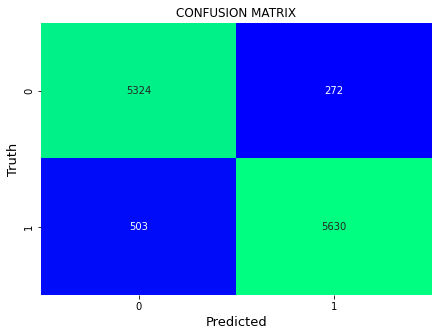

In [ ]:
plot_confusion_matrix(y_test, ensemble_rf_svm_pred)

# RF + KNN

In [ ]:
ensemble_rf_knn = VotingClassifier(estimators= [("Random Forest", ranClf), ("K Nearest Neighbor", knnClf)], voting= "hard").fit(X_train, y_train)

In [ ]:
ensemble_rf_knn_test = Timer()
ensemble_rf_knn_test.start()

ensemble_rf_knn_pred = ensemble_rf_knn.predict(X_test)

ensemble_rf_knn_test.stop()

elapsed time = 10.846126550999998 seconds


In [ ]:
save_pickle(ensemble_rf_knn, "ensemble_rf_knn")

*** ensemble_rf_knn saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_rf_knn_pred)

Accuracy = 0.9376758461931963
precision = 0.9609215017064846
recall = 0.9181477254198598
f1 = 0.9390477778704245


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5596
           1       0.96      0.92      0.94      6133

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



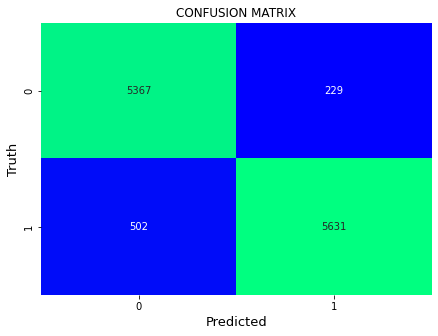

In [ ]:
plot_confusion_matrix(y_test, ensemble_rf_knn_pred)

# RF + MLP

In [ ]:
ensemble_rf_mlp = VotingClassifier(estimators= [("Random Forest", ranClf), ("MultiLayer Perceptron", mlpClf)], voting= "hard").fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
ensemble_rf_mlp_test = Timer()
ensemble_rf_mlp_test.start()

ensemble_rf_mlp_pred = ensemble_rf_mlp.predict(X_test)

ensemble_rf_mlp_test.stop()

elapsed time = 0.33452554099994813 seconds


In [ ]:
save_pickle(ensemble_rf_mlp, "ensemble_rf_mlp")

*** ensemble_rf_mlp saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_rf_mlp_pred)

Accuracy = 0.9450933583425697
precision = 0.9624262847514743
recall = 0.9313549649437469
f1 = 0.9466357308584687


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5596
           1       0.96      0.93      0.95      6133

    accuracy                           0.95     11729
   macro avg       0.94      0.95      0.95     11729
weighted avg       0.95      0.95      0.95     11729



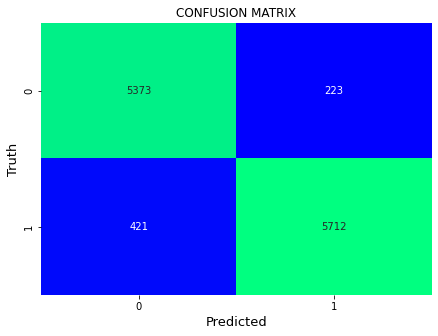

In [ ]:
plot_confusion_matrix(y_test, ensemble_rf_mlp_pred)

# ERT + SVM

In [ ]:
ensemble_ert_svm = VotingClassifier(estimators= [("Extremely Randomized Tree", ertClf), ("Support Vector Machine", svmClf)], voting= "hard").fit(X_train, y_train)

In [ ]:
ensemble_ert_svm_test = Timer()
ensemble_ert_svm_test.start()

ensemble_ert_svm_pred = ensemble_ert_svm.predict(X_test)

ensemble_ert_svm_test.stop()

elapsed time = 20.138517342 seconds


In [ ]:
save_pickle(ensemble_ert_svm, "ensemble_ert_svm")

*** ensemble_ert_svm saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_ert_svm_pred)

Accuracy = 0.9346065308210418
precision = 0.9555178268251273
recall = 0.9176585684004566
f1 = 0.9362056059219829


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5596
           1       0.96      0.92      0.94      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.94      0.93     11729
weighted avg       0.94      0.93      0.93     11729



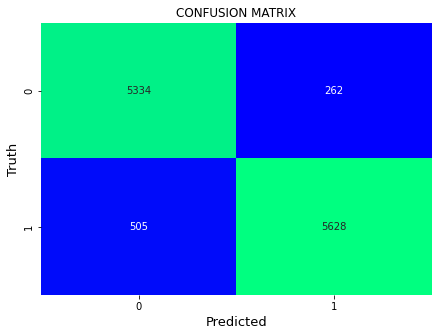

In [ ]:
plot_confusion_matrix(y_test, ensemble_ert_svm_pred)

# ERT + KNN

In [ ]:
ensemble_ert_knn = VotingClassifier(estimators= [("Extremely Randomized Tree", ertClf), ("K Nearest Neighbor", knnClf)], voting= "hard").fit(X_train, y_train)

In [ ]:
ensemble_ert_knn_test = Timer()
ensemble_ert_knn_test.start()

ensemble_ert_knn_pred = ensemble_ert_knn.predict(X_test)

ensemble_ert_knn_test.stop()

elapsed time = 11.540266203999977 seconds


In [ ]:
save_pickle(ensemble_ert_knn, "ensemble_ert_knn")

*** ensemble_ert_knn saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_ert_knn_pred)

Accuracy = 0.9378463637138716
precision = 0.9595238095238096
recall = 0.9199413011576716
f1 = 0.9393157412802797


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5596
           1       0.96      0.92      0.94      6133

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



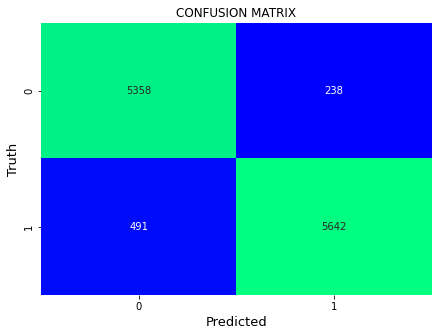

In [ ]:
plot_confusion_matrix(y_test, ensemble_ert_knn_pred)

# ERT + MLP

In [ ]:
ensemble_ert_mlp = VotingClassifier(estimators= [("Extremely Randomized Tree", ertClf), ("MultiLayer Perceptron", mlpClf)], voting= "hard").fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
ensemble_ert_mlp_test = Timer()
ensemble_ert_mlp_test.start()

ensemble_ert_mlp_pred = ensemble_ert_mlp.predict(X_test)

ensemble_ert_mlp_test.stop()

elapsed time = 0.4333580280000433 seconds


In [ ]:
save_pickle(ensemble_ert_mlp, "ensemble_ert_mlp")

*** ensemble_ert_mlp saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_ert_mlp_pred)

Accuracy = 0.9440702532185182
precision = 0.9659690318189552
recall = 0.9256481330507093
f1 = 0.9453788509575354


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5596
           1       0.97      0.93      0.95      6133

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.95      0.94      0.94     11729



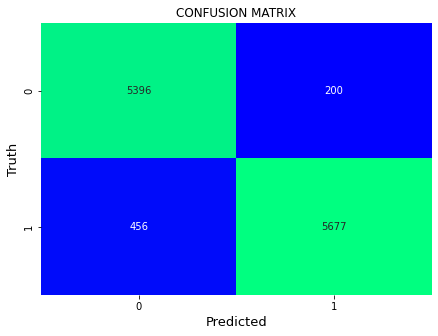

In [ ]:
plot_confusion_matrix(y_test, ensemble_ert_mlp_pred)

# SVM + KNN

In [ ]:
ensemble_svm_knn = VotingClassifier(estimators= [("Support Vector Machine", svmClf), ("K Nearest Neighbor", knnClf)], voting= "hard").fit(X_train, y_train)

In [ ]:
ensemble_svm_knn_test = Timer()
ensemble_svm_knn_test.start()

ensemble_svm_knn_pred = ensemble_svm_knn.predict(X_test)

ensemble_svm_knn_test.stop()

elapsed time = 29.952656825999952 seconds


In [ ]:
save_pickle(ensemble_svm_knn, "ensemble_svm_knn")

*** ensemble_svm_knn saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_svm_knn_pred)

Accuracy = 0.925483843464916
precision = 0.9567483064095883
recall = 0.8980922876243274
f1 = 0.9264928511354079


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.90      0.96      0.92      5596
           1       0.96      0.90      0.93      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



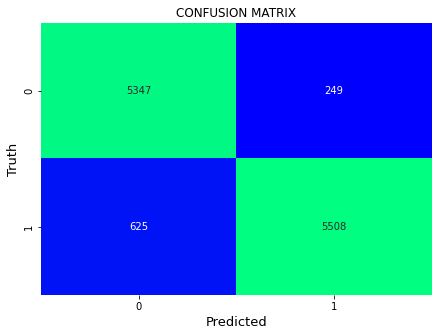

In [ ]:
plot_confusion_matrix(y_test, ensemble_svm_knn_pred)

# SVM + MLP

In [ ]:
ensemble_svm_mlp = VotingClassifier(estimators= [("Support Vector Machine", svmClf), ("MultiLayer Perceptron", mlpClf)], voting= "hard").fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
ensemble_svm_mlp_test = Timer()
ensemble_svm_mlp_test.start()

ensemble_svm_mlp_pred = ensemble_svm_mlp.predict(X_test)

ensemble_svm_mlp_test.stop()

elapsed time = 20.590393475999917 seconds


In [ ]:
save_pickle(ensemble_svm_mlp, "ensemble_svm_mlp")

*** ensemble_svm_mlp saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_svm_mlp_pred)

Accuracy = 0.9311109216471992
precision = 0.9572385368366821
recall = 0.9088537420511984
f1 = 0.9324188691870191


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5596
           1       0.96      0.91      0.93      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



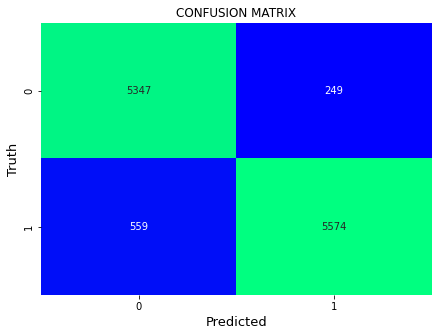

In [ ]:
plot_confusion_matrix(y_test, ensemble_svm_mlp_pred)

# KNN + MLP

In [ ]:
ensemble_knn_mlp = VotingClassifier(estimators= [("K Nearest Neighbor", knnClf), ("MultiLayer Perceptron", mlpClf)], voting= "hard").fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
ensemble_knn_mlp_test = Timer()
ensemble_knn_mlp_test.start()

ensemble_knn_mlp_pred = ensemble_knn_mlp.predict(X_test)

ensemble_knn_mlp_test.stop()

elapsed time = 10.74710246099994 seconds


In [ ]:
save_pickle(ensemble_knn_mlp, "ensemble_knn_mlp")

*** ensemble_knn_mlp saved successfully ***


In [ ]:
perform_metrics(y_test, ensemble_knn_mlp_pred)

Accuracy = 0.9374200699121835
precision = 0.9672840574692747
recall = 0.9111364748084135
f1 = 0.9383711167086483


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5596
           1       0.97      0.91      0.94      6133

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



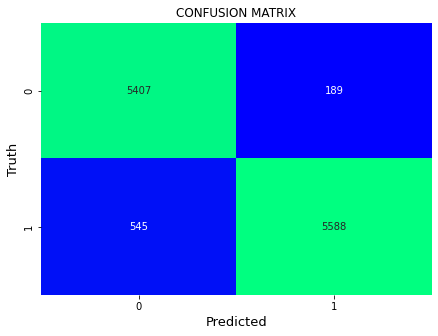

In [ ]:
plot_confusion_matrix(y_test, ensemble_knn_mlp_pred)